In [40]:
import pandas as pd
import numpy as np
import os 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, silhouette_score
import category_encoders as ce
from sklearn.decomposition import PCA
from JPMC_LIB import JPMC_LIB as jpmc_lib

In [6]:
file1 = r"C:\Users\thema\OneDrive\Projects\JPMC_Fraud_Analysis\data\fraudTrain.csv"
file2 = r"C:\Users\thema\OneDrive\Projects\JPMC_Fraud_Analysis\data\fraudTest.csv"


df1=pd.read_csv(file1)
df2=pd.read_csv(file2)


In [7]:
df1['id'] = 'train'
df2['id'] = 'test'

In [8]:
df = pd.concat([df1, df2], axis = 0)

In [9]:
df.shape

(1852394, 24)

In [10]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,id
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


In [11]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [12]:
info_df = pd.DataFrame({'nulls': df.isnull().sum(), 'dtypes': df.dtypes})
info_df

,nulls,dtypes
trans_date_trans_time,0,object
cc_num,0,int64
merchant,0,object
category,0,object
amt,0,float64
first,0,object
last,0,object
gender,0,object
street,0,object
city,0,object


In [13]:
duplicates = df.duplicated().sum()
duplicates

0

In [14]:
# Convert string datetime to pandas datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second

# Drop the original datetime column


In [15]:
# New age collumn for each person according to transaction

df['dob'] = pd.to_datetime(df['dob'])
df['age']=df['year'] - df['dob'].dt.year

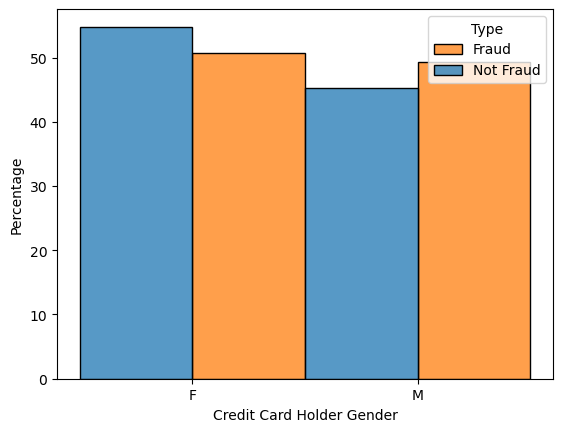

In [16]:
#Gender vs Fraud
jpmc_lib.plot_gender_fraud_relationship(df)

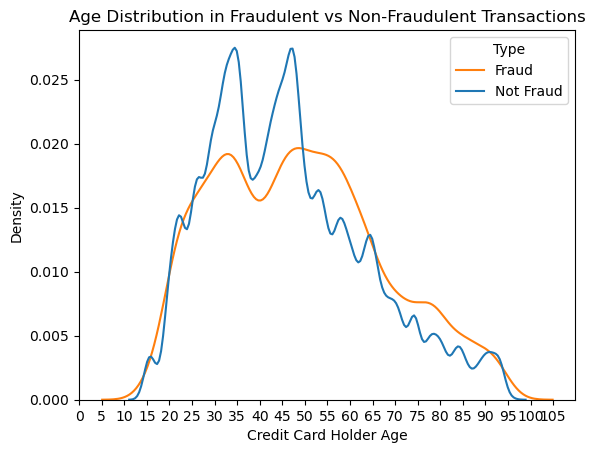

In [18]:
#age vs fraud
jpmc_lib.plot_age_distribution(df)

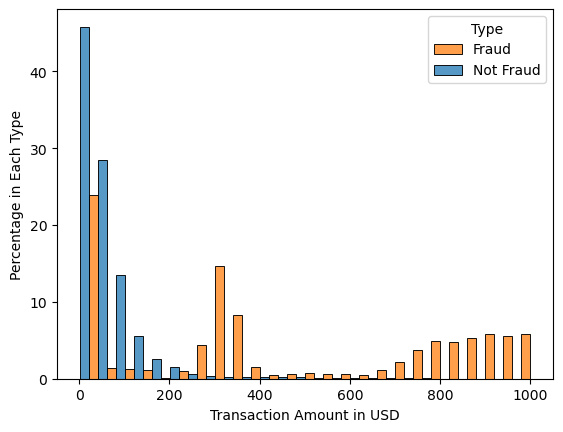

In [19]:
#amount vs fraud
jpmc_lib.plot_transaction_amount_distribution(df)

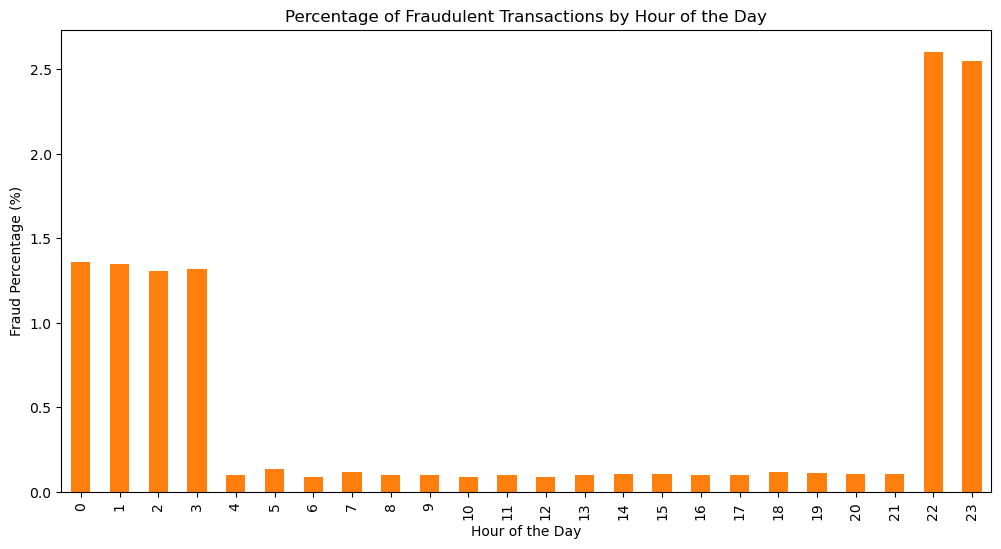

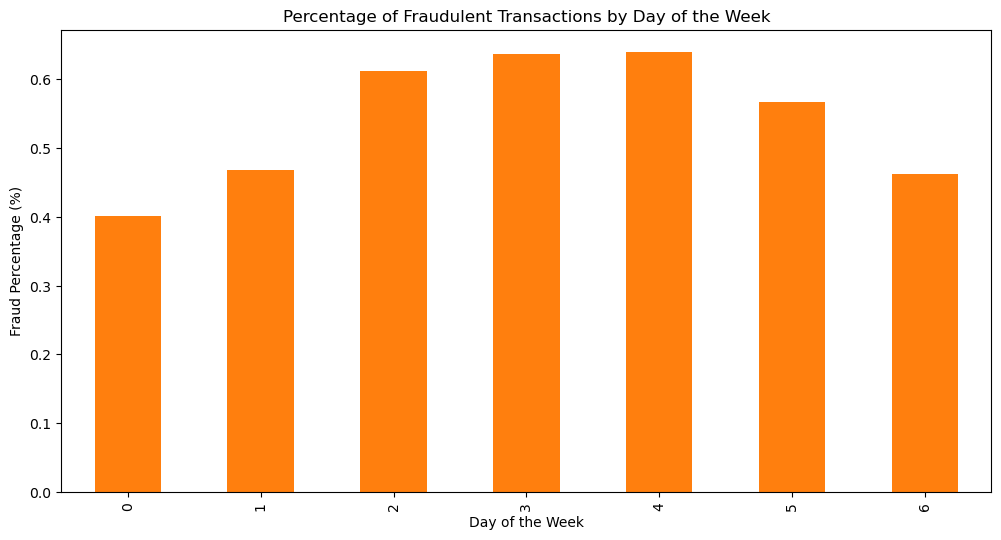

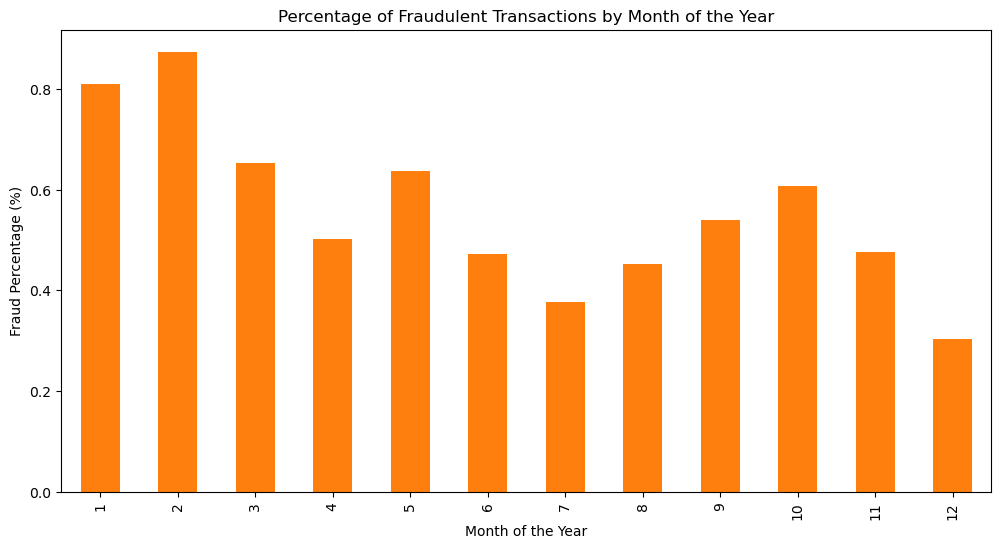

In [20]:
#group by hours of the day
group_by_hour = df.groupby('hour')['is_fraud'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Fraud'})
jpmc_lib.plot_fraud_percentage_bytime(group_by_hour, 'Percentage of Fraudulent Transactions by Hour of the Day', 'Hour of the Day')

# Group by day of the week
group_by_day = df.groupby('day')['is_fraud'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Fraud'}) 
jpmc_lib.plot_fraud_percentage_bytime(group_by_day, 'Percentage of Fraudulent Transactions by Day of the Week', 'Day of the Week')

# Group by month of the year
group_by_month = df.groupby('month')['is_fraud'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Fraud'}) 
jpmc_lib.plot_fraud_percentage_bytime(group_by_month, 'Percentage of Fraudulent Transactions by Month of the Year', 'Month of the Year')

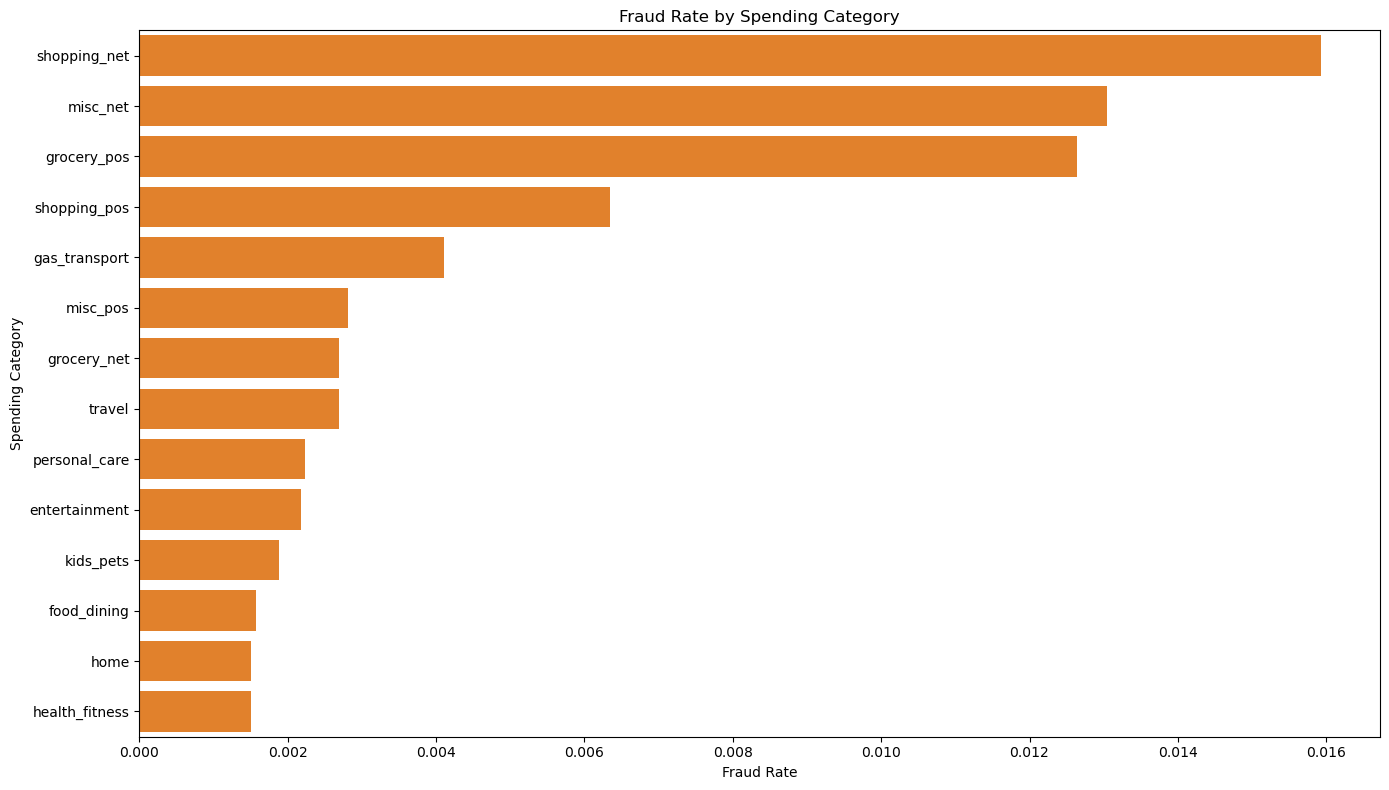

In [21]:
jpmc_lib.plot_fraud_rate_by_category(df)

In [22]:
woe = ce.WOEEncoder()
y = df['is_fraud']

In [23]:
X = df['category']
df['enc_category'] = woe.fit_transform(X,y)

In [24]:
X = df['state']
df['enc_state'] = woe.fit_transform(X,y)

In [25]:
freq_enc = (df.groupby("cc_num").size())
df['cc_frequency'] = df["cc_num"].apply(lambda x: freq_enc[x])

In [26]:
cc_nums = df['cc_num'].nunique()
people = (df['first'] + df['last']).nunique()

cc_nums, people

(999, 989)

In [27]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'id', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'age', 'enc_category', 'enc_state', 'cc_frequency'],
      dtype='object')

In [28]:
filtered_df = df.drop(columns = ['trans_date_trans_time', 'state', 'category', 'unix_time', 'cc_num','merchant','gender','street','city','job', 'dob', 'year', 'minute', 'second', 'trans_num', 'first', 'last'])

In [29]:
filtered_df.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,id,month,day,hour,age,enc_category,enc_state,cc_frequency
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,train,1,1,0,31,0.925860,-0.137702,2927
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,train,1,1,0,41,0.894448,-0.104509,4362
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,train,1,1,0,57,-0.872388,-0.209468,735
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,train,1,1,0,52,-0.238221,-0.225199,743
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,train,1,1,0,33,-0.613751,0.231808,2922


In [30]:
Train_set = filtered_df[filtered_df['id'] == 'train']
Test_set = filtered_df[filtered_df['id'] == 'test']

Train_set.drop(columns= 'id', inplace = True)
Test_set.drop(columns= 'id', inplace = True)

In [31]:
X_train = Train_set.drop(columns = 'is_fraud')
y_train = Train_set['is_fraud']

X_test = Test_set.drop(columns= 'is_fraud')
y_test = Test_set['is_fraud']

In [32]:
X_train.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,month,day,hour,age,enc_category,enc_state,cc_frequency
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,1,1,0,31,0.925860,-0.137702,2927
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,1,1,0,41,0.894448,-0.104509,4362
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,1,1,0,57,-0.872388,-0.209468,735
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,1,1,0,52,-0.238221,-0.225199,743
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,1,1,0,33,-0.613751,0.231808,2922


In [33]:
X_train.dtypes

amt             float64
zip               int64
lat             float64
long            float64
city_pop          int64
merch_lat       float64
merch_long      float64
month             int32
day               int32
hour              int32
age               int32
enc_category    float64
enc_state       float64
cc_frequency      int64
dtype: object

In [ ]:
rf=RandomForestClassifier(n_estimators=75, max_depth= 27, n_jobs = -1)
all_sampling_params = {}
for rate in [0.1, 0.5, 0.9]:
    for technique in ['undersample', 'oversample', 'smote']:
        sampling_params = jpmc_lib.resampling_evaluation(X_train, y_train, X_test, y_test, rf, sampling_technique=technique, rate =rate)
        all_sampling_params[f'{technique}({rate})'] = sampling_params

In [ ]:
for sampling_param in all_sampling_params.keys():
    print(f'{sampling_param}:{all_sampling_params[sampling_param]} \n')

undersample(0.1):{'recall': 0.806993006993007, 'precision': 0.6160142348754448, 'f1': 0.6986881937436932, 'roc_auc': 0.9025219273784054} 

oversample(0.1):{'recall': 0.6904428904428904, 'precision': 0.9391249207355739, 'f1': 0.7958087049973133, 'roc_auc': 0.8451347359468045} 

smote(0.1):{'recall': 0.676923076923077, 'precision': 0.9052369077306733, 'f1': 0.7746065617497999, 'roc_auc': 0.8383242487766905} 

undersample(0.5):{'recall': 0.9016317016317016, 'precision': 0.20671227020094057, 'f1': 0.3363185809929571, 'roc_auc': 0.9441121400201847} 

oversample(0.5):{'recall': 0.6741258741258741, 'precision': 0.9335054874112331, 'f1': 0.7828911748781807, 'roc_auc': 0.8369699052370203} 

smote(0.5):{'recall': 0.6727272727272727, 'precision': 0.8869084204056545, 'f1': 0.7651113467656416, 'roc_auc': 0.8361974435872416} 

undersample(0.9):{'recall': 0.9258741258741259, 'precision': 0.11905047356432083, 'f1': 0.2109736017421788, 'roc_auc': 0.9496633181441355} 

oversample(0.9):{'recall': 0.67459

In [ ]:

rus = RandomUnderSampler(sampling_strategy= 0.05)
smote = SMOTE(sampling_strategy = 0.1)
Xsampled, ysampled = rus.fit_resample(X_train, y_train)
Xsampled, ysampled = smote.fit_resample(Xsampled, ysampled)
rf.fit(Xsampled, ysampled)
sampled_pred = rf.predict(X_test)
sampled_f1 = f1_score(y_test, sampled_pred)
sampled_precision = precision_score(y_test, sampled_pred)
sampled_recall = recall_score(y_test, sampled_pred)
sampled_roc = roc_auc_score(y_test, sampled_pred)
print(f":\n recall:{sampled_recall}, precision:{sampled_precision}, f1:{sampled_f1}, roc_auc: {sampled_roc}")
print(Xsampled.shape[0] - 1296675)

:
 recall:0.7836829836829837, precision:0.6794664510913501, f1:0.727863173847153, roc_auc: 0.8911252371040945
-1131543


In [34]:
X_train_scaled = X_train.copy()

In [35]:
X_train_scaled[X_train_scaled.columns] = StandardScaler().fit_transform(X_train_scaled)

In [36]:
pca_2 = PCA(n_components=3)
pca_2_result = pca_2.fit_transform(X_train_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
    np.sum(pca_2.explained_variance_ratio_)))

# Results from pca.components_
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=X_train_scaled.columns, index=['PC_1', 'PC_2', 'PC_3'])
print('\n\n', dataset_pca)

print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")


Explained variation per principal component: [0.20964956 0.15493753 0.11230968]
Cumulative variance explained by 2 principal components: 47.69%


            amt       zip       lat      long  city_pop  merch_lat  merch_long  \
PC_1  0.001087  0.561447  0.105265  0.562528  0.073651   0.105037    0.562375   
PC_2  0.000379  0.044540  0.635008  0.150666  0.174410   0.634662    0.150631   
PC_3  0.114754  0.006032  0.133672  0.000683  0.030901   0.133982    0.000731   

         month       day      hour       age  enc_category  enc_state  \
PC_1  0.001102  0.001213  0.008175  0.001227      0.001941   0.152000   
PC_2  0.002226  0.002167  0.058864  0.134389      0.023975   0.285463   
PC_3  0.008064  0.012270  0.613009  0.406897      0.511269   0.066895   

      cc_frequency  
PC_1      0.036821  
PC_2      0.112152  
PC_3      0.377608  

*************** Most important features *************************
As per PC 1:
 zip           0.561447
long          0.562528
merch_long    0.562375
N

In [41]:
jpmc_lib.kmean_hyper_param_tuning(X_train_scaled)

TypeError: missing a required argument: 'X'